In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
path = '../0.data_final_12/'
image_folder = f'{path}data-filter'
image_path = f'{image_folder}/01d6ce0d-6bff-4a49-86ec-26b39b763961.png'

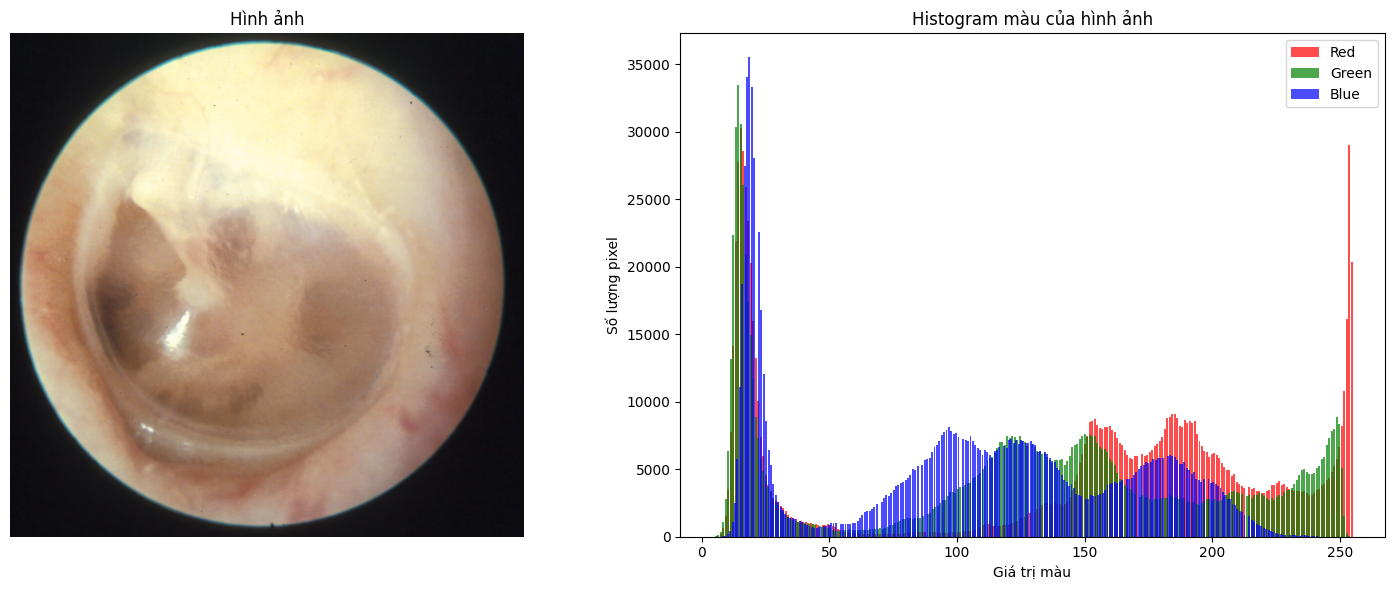

In [3]:
image = cv2.imread(image_path)

if image is None:
    print("Không thể đọc hình ảnh. Kiểm tra lại đường dẫn.")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Tạo một cửa sổ với 2 subplot: 1 cho hình ảnh, 1 cho histogram
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Hiển thị bức ảnh
    axes[0].imshow(image_rgb)
    axes[0].axis('off')  # Tắt trục
    axes[0].set_title('Hình ảnh')

    # Vẽ histogram cho từng kênh màu R, G, B
    axes[1].hist(image_rgb[:,:,0].ravel(), bins=256, color='red', alpha=0.7, rwidth=0.8, label='Red')
    axes[1].hist(image_rgb[:,:,1].ravel(), bins=256, color='green', alpha=0.7, rwidth=0.8, label='Green')
    axes[1].hist(image_rgb[:,:,2].ravel(), bins=256, color='blue', alpha=0.7, rwidth=0.8, label='Blue')

    axes[1].set_xlabel('Giá trị màu')
    axes[1].set_ylabel('Số lượng pixel')
    axes[1].set_title('Histogram màu của hình ảnh')
    axes[1].legend()

    plt.tight_layout()  # Đảm bảo các subplot không bị chồng lên nhau
    plt.show()

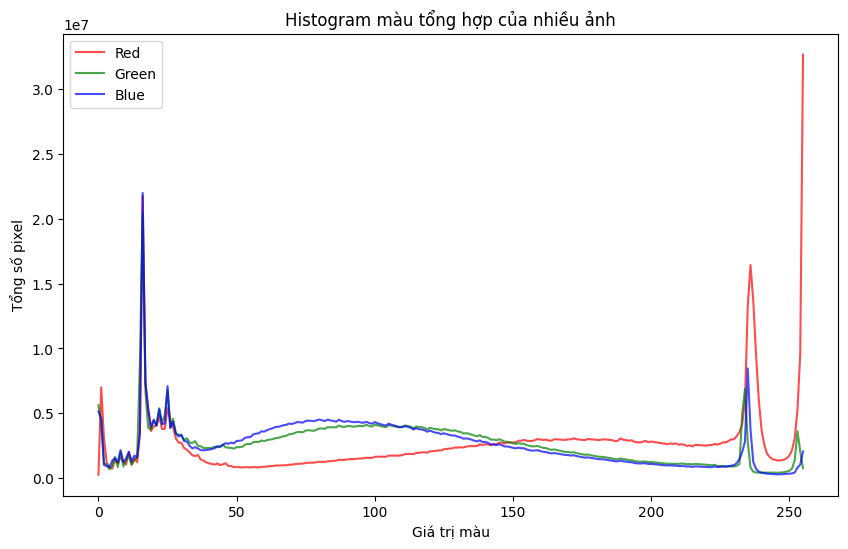

In [4]:
# Hàm tính histogram màu của nhiều ảnh
def combine_histograms(image_paths):
    # Khởi tạo biến để lưu trữ tổng giá trị màu của tất cả ảnh
    total_red = np.zeros((256,), dtype=np.float64)
    total_green = np.zeros((256,), dtype=np.float64)
    total_blue = np.zeros((256,), dtype=np.float64)

    # Đọc từng ảnh và cộng dồn histogram của từng kênh màu
    for path in image_paths:
        image = cv2.imread(path)
        if image is None:
            print(f"Không thể đọc hình ảnh: {path}")
            continue
        
        # Chuyển đổi không gian màu từ BGR sang RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Tính histogram cho từng kênh màu R, G, B
        red_hist = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
        green_hist = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
        blue_hist = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

        # Cộng dồn các giá trị histogram vào tổng
        total_red += red_hist.flatten()
        total_green += green_hist.flatten()
        total_blue += blue_hist.flatten()

    return total_red, total_green, total_blue

# Đọc danh sách các ảnh từ thư mục
image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.png')]

# Tổng hợp histogram của các ảnh
total_red, total_green, total_blue = combine_histograms(image_paths)

# Vẽ histogram cho tất cả các ảnh
plt.figure(figsize=(10, 6))

# Vẽ histogram cho kênh màu đỏ (Red)
plt.plot(range(256), total_red, color='red', label='Red', alpha=0.7)

# Vẽ histogram cho kênh màu xanh lá cây (Green)
plt.plot(range(256), total_green, color='green', label='Green', alpha=0.7)

# Vẽ histogram cho kênh màu xanh dương (Blue)
plt.plot(range(256), total_blue, color='blue', label='Blue', alpha=0.7)

plt.xlabel('Giá trị màu')
plt.ylabel('Tổng số pixel')
plt.title('Histogram màu tổng hợp của nhiều ảnh')
plt.legend()
plt.show()


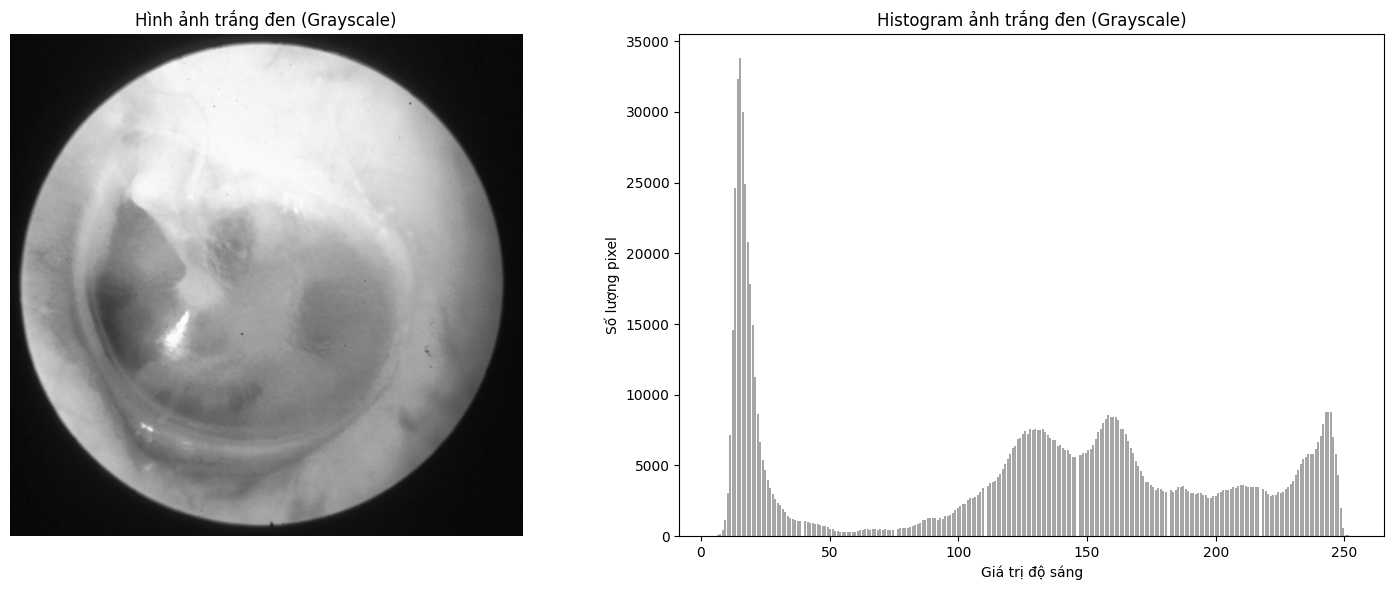

In [5]:
image = cv2.imread(image_path)

if image is None:
    print("Không thể đọc hình ảnh. Kiểm tra lại đường dẫn.")
else:
    # Chuyển ảnh sang xám (grayscale)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Tạo một cửa sổ với 2 subplot: 1 cho hình ảnh xám, 1 cho histogram
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Hiển thị ảnh xám (grayscale)
    axes[0].imshow(gray_image, cmap='gray')
    axes[0].axis('off')  # Tắt trục
    axes[0].set_title('Hình ảnh trắng đen (Grayscale)')

    # Vẽ histogram cho ảnh grayscale
    axes[1].hist(gray_image.ravel(), bins=256, color='gray', alpha=0.7, rwidth=0.8)

    axes[1].set_xlabel('Giá trị độ sáng')
    axes[1].set_ylabel('Số lượng pixel')
    axes[1].set_title('Histogram ảnh trắng đen (Grayscale)')

    plt.tight_layout()  # Đảm bảo các subplot không bị chồng lên nhau
    plt.show()

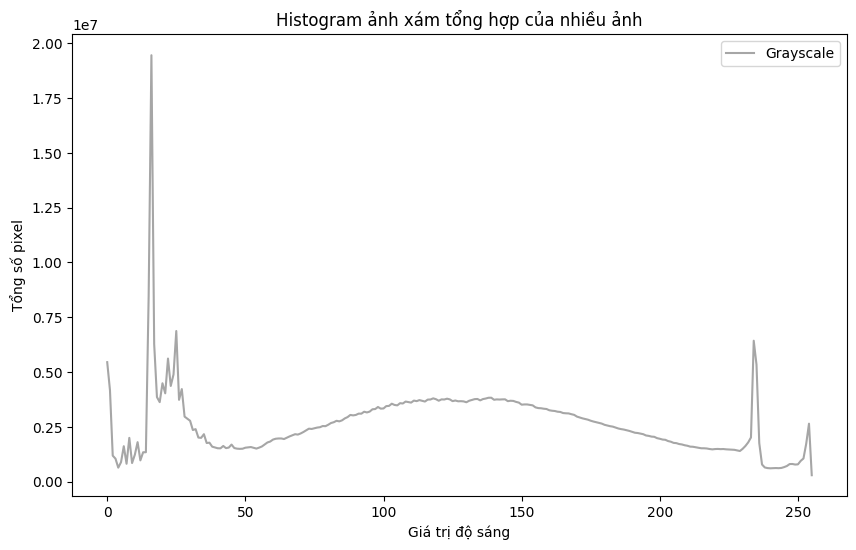

In [6]:
# Hàm tính histogram xám (grayscale) của nhiều ảnh
def combine_histograms(image_paths):
    # Khởi tạo biến để lưu trữ tổng giá trị màu xám của tất cả ảnh
    total_gray = np.zeros((256,), dtype=np.float64)

    # Đọc từng ảnh và cộng dồn histogram của ảnh xám
    for path in image_paths:
        image = cv2.imread(path)
        if image is None:
            print(f"Không thể đọc hình ảnh: {path}")
            continue
        
        # Chuyển đổi không gian màu từ BGR sang Grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Tính histogram cho ảnh xám
        gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

        # Cộng dồn các giá trị histogram vào tổng
        total_gray += gray_hist.flatten()

    return total_gray

# Đọc danh sách các ảnh từ thư mục
image_folder = f'{path}data-filter'
image_paths = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder) if filename.endswith('.png')]

# Tổng hợp histogram của các ảnh xám
total_gray = combine_histograms(image_paths)

# Vẽ histogram cho tất cả các ảnh
plt.figure(figsize=(10, 6))

# Vẽ histogram cho ảnh xám
plt.plot(range(256), total_gray, color='gray', label='Grayscale', alpha=0.7)

plt.xlabel('Giá trị độ sáng')
plt.ylabel('Tổng số pixel')
plt.title('Histogram ảnh xám tổng hợp của nhiều ảnh')
plt.legend()
plt.show()